In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score


In [20]:
data= pd.read_csv("dirty_v3_path.csv")
data.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

In [22]:
data.shape

(30000, 20)

In [23]:
data.isna().sum()

Age                  4500
Gender               4500
Medical Condition    4500
Glucose              4500
Blood Pressure       4500
BMI                     0
Oxygen Saturation       0
LengthOfStay            0
Cholesterol             0
Triglycerides           0
HbA1c                   0
Smoking                 0
Alcohol                 0
Physical Activity       0
Diet Score              0
Family History          0
Stress Level            0
Sleep Hours             0
random_notes            0
noise_col               0
dtype: int64

In [24]:
data.duplicated().sum()

0

In [25]:
data.describe()


,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
count,25500.000000,25500.000000,25500.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,54.616784,123.622179,140.455337,28.476155,94.954992,4.414133,213.033891,176.837375,6.294377,0.279767,0.238533,3.803214,4.029654,0.439433,5.917312,6.229836,-0.517010
std,15.973618,41.576943,21.077933,5.728804,3.736202,2.761536,33.519757,48.812827,1.320269,0.448892,0.426194,2.011729,1.817165,0.496326,2.225057,1.187669,100.076959
min,10.000000,20.320000,74.240000,7.670000,67.510000,1.000000,95.730000,-22.480000,3.280000,0.000000,0.000000,-3.680000,-1.750000,0.000000,-2.440000,1.590000,-412.169596
25%,45.000000,96.280000,125.140000,24.590000,93.000000,3.000000,189.500000,141.280000,5.330000,0.000000,0.000000,2.350000,2.770000,0.000000,4.370000,5.410000,-68.270749
50%,55.000000,110.500000,138.320000,28.050000,95.300000,4.000000,211.835000,173.365000,5.970000,0.000000,0.000000,3.590000,3.790000,0.000000,5.900000,6.230000,-0.510742
75%,66.000000,136.610000,153.790000,31.810000,97.380000,5.000000,235.310000,208.630000,6.920000,1.000000,0.000000,5.060000,5.020000,1.000000,7.440000,7.050000,66.811399
max,89.000000,318.510000,226.380000,56.850000,110.070000,19.000000,358.370000,421.510000,12.360000,1.000000,1.000000,12.410000,12.060000,1.000000,15.450000,10.350000,467.894910


In [26]:
data.dtypes


Age                  float64
Gender                object
Medical Condition     object
Glucose              float64
Blood Pressure       float64
BMI                  float64
Oxygen Saturation    float64
LengthOfStay           int64
Cholesterol          float64
Triglycerides        float64
HbA1c                float64
Smoking                int64
Alcohol                int64
Physical Activity    float64
Diet Score           float64
Family History         int64
Stress Level         float64
Sleep Hours          float64
random_notes          object
noise_col            float64
dtype: object

In [28]:
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()

In [33]:

# Value counts for target and gender
medical_counts = data['Medical Condition'].value_counts(dropna=False)
gender_counts = data['Gender'].value_counts(dropna=False)

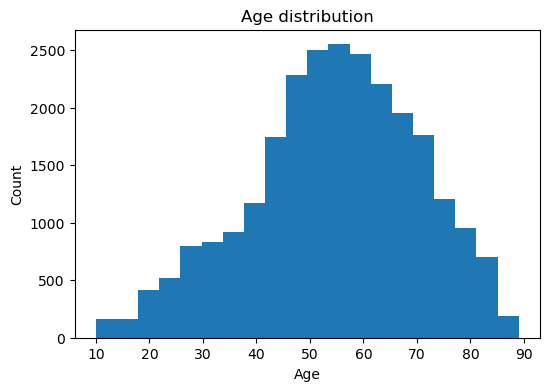

In [36]:
# --- Visualizations (matplotlib only, one plot per cell) ---
# 1. Histogram for Age
plt.figure(figsize=(6,4))
plt.hist(data['Age'].dropna(), bins=20)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



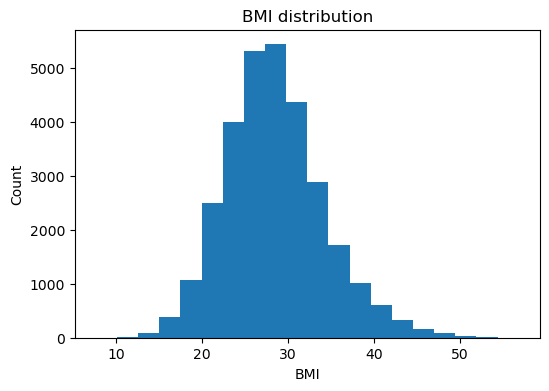

In [37]:
# 2. Histogram for BMI
plt.figure(figsize=(6,4))
plt.hist(data['BMI'].dropna(), bins=20)
plt.title("BMI distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

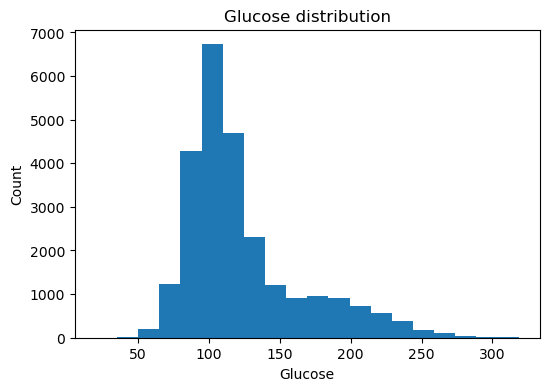

In [38]:
# 3. Histogram for Glucose
plt.figure(figsize=(6,4))
plt.hist(data['Glucose'].dropna(), bins=20)
plt.title("Glucose distribution")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23376\1648977439.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=conds, vert=True)


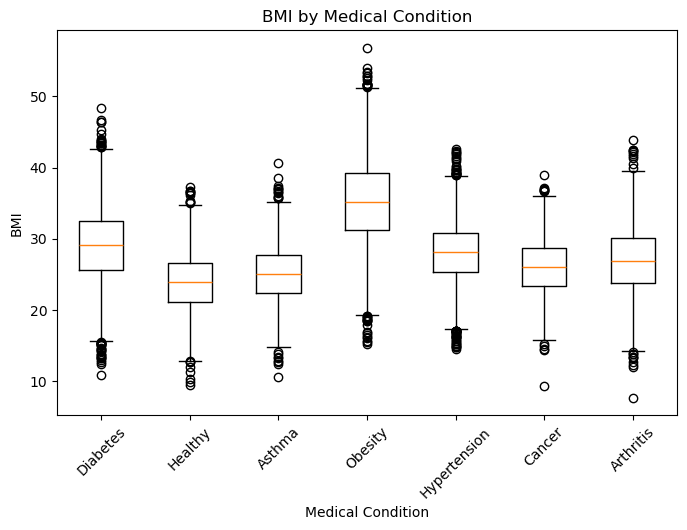

In [41]:
# 4. Boxplot BMI by Medical Condition
plt.figure(figsize=(8,5))
conds = data['Medical Condition'].dropna().unique()
data_to_plot = [data.loc[data['Medical Condition']==c, 'BMI'].dropna() for c in conds]
plt.boxplot(data_to_plot, labels=conds, vert=True)
plt.title("BMI by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("BMI")
plt.xticks(rotation=45)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23376\2420883774.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=conds, vert=True)


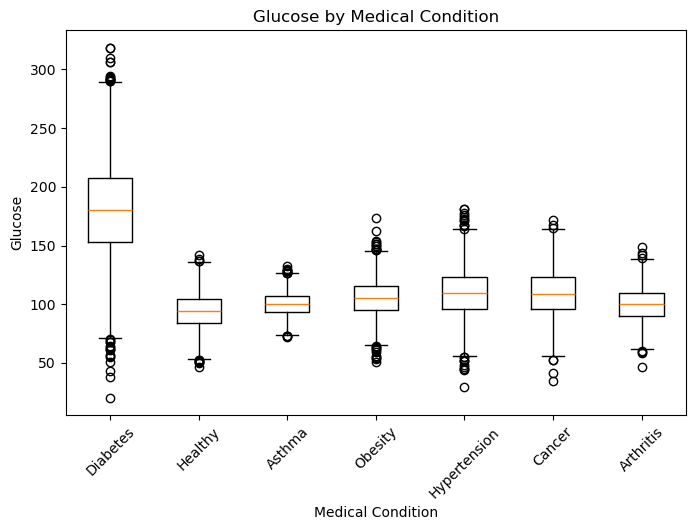

In [42]:
# 5. Boxplot Glucose by Medical Condition
plt.figure(figsize=(8,5))
data_to_plot = [data.loc[data['Medical Condition']==c, 'Glucose'].dropna() for c in conds]
plt.boxplot(data_to_plot, labels=conds, vert=True)
plt.title("Glucose by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Glucose")
plt.xticks(rotation=45)
plt.show()

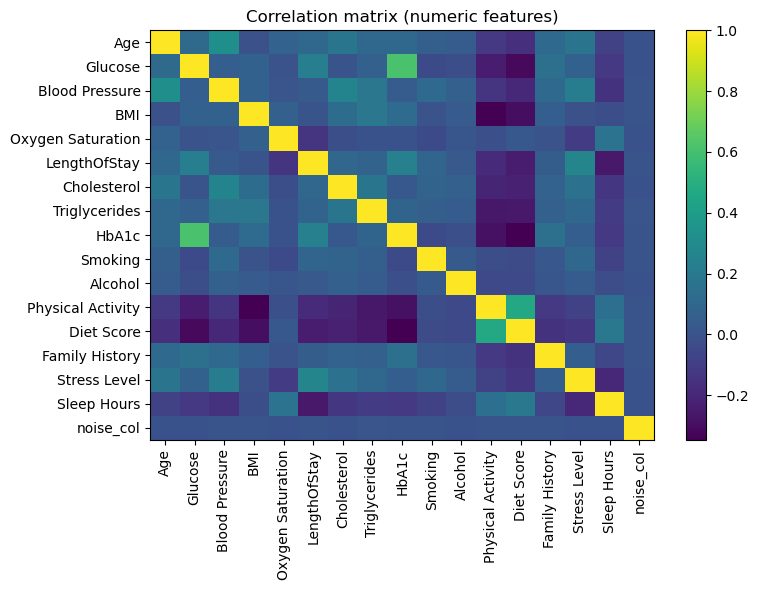

In [43]:
# 6. Correlation matrix heatmap (numeric)
corr = data[num_cols].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title("Correlation matrix (numeric features)")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.show()

In [46]:
# 1. Drop obvious noise columns
# --- Data Cleaning ---
df_clean = data.copy()
for col in ['random_notes', 'noise_col']:
    if col in df_clean.columns:
        df_clean = df_clean.drop(columns=[col])

In [47]:
# 2. Standardize column names (strip)
df_clean.columns = [c.strip() for c in df_clean.columns]

In [48]:
# 3. Fix obvious type issues: ensure numeric columns are numeric
for c in num_cols:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(df_clean[c], errors='coerce')

In [49]:
# 4. Impute missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [50]:

# Apply numeric imputation
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns.tolist()
df_clean[numeric_columns] = num_imputer.fit_transform(df_clean[numeric_columns])


In [51]:
# Categorical impute
categorical_columns = df_clean.select_dtypes(exclude=[np.number]).columns.tolist()
# Exclude target from categorical imputation for now (we'll keep it as is but fill na if any)
if 'Medical Condition' in categorical_columns:
    categorical_columns.remove('Medical Condition')
df_clean[categorical_columns] = cat_imputer.fit_transform(df_clean[categorical_columns])


In [52]:
# --- Preprocessing ---
# Target encoding
label_enc = LabelEncoder()
df_clean['target'] = label_enc.fit_transform(df_clean['Medical Condition'])


In [53]:
# Features selection
# Drop Medical Condition original (target), keep rest
X = df_clean.drop(columns=['Medical Condition', 'target'])
y = df_clean['target']


In [54]:
# Identify categorical columns in X
X_cat = X.select_dtypes(exclude=[np.number]).columns.tolist()
X_num = X.select_dtypes(include=[np.number]).columns.tolist()

In [56]:
# Build preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), X_num),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), X_cat)
])


In [57]:

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit-transform preprocessing on train and transform test
X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)


In [58]:
# Get feature names after OneHot
ohe = preprocessor.named_transformers_['cat']
ohe_cols = ohe.get_feature_names_out(X_cat) if X_cat else []
feature_names = X_num + list(ohe_cols)

In [61]:

#  Defining Model
# -----------------------------
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=1  # avoids multiprocessing crash
    )
}  

# -----------------------------
target_names_safe = [str(x) for x in label_enc.classes_]

print("Target class names:", target_names_safe)

# -----------------------------
# MODEL TRAINING & EVALUATION
# -----------------------------
results = {}

for name, model in models.items():

    print(f"\nTraining model: {name} ...")

    # Fit model
    model.fit(X_train_p, y_train)

    # Predict
    preds = model.predict(X_test_p)

    # Metrics
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='macro')
    report = classification_report(
        y_test, preds,
        target_names=target_names_safe,
        zero_division=0
    )
    cm = confusion_matrix(y_test, preds)

    # Store results
    results[name] = {
        "accuracy": acc,
        "f1_macro": f1,
        "report": report,
        "confusion_matrix": cm,
        "model": model
    }

    # Print performance
    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print("Macro F1:", f1)
    print(report)


Target class names: ['Arthritis', 'Asthma', 'Cancer', 'Diabetes', 'Healthy', 'Hypertension', 'Obesity', 'nan']

Training model: LogisticRegression ...

=== LogisticRegression ===
Accuracy: 0.7255
Macro F1: 0.7044787404147972
              precision    recall  f1-score   support

   Arthritis       0.69      0.52      0.59       359
      Asthma       0.80      0.80      0.80       407
      Cancer       0.84      0.79      0.82       247
    Diabetes       0.82      0.88      0.85      1283
     Healthy       0.85      0.98      0.91       608
Hypertension       0.72      0.84      0.78      1424
     Obesity       0.75      0.84      0.79       772
         nan       0.14      0.07      0.09       900

    accuracy                           0.73      6000
   macro avg       0.70      0.72      0.70      6000
weighted avg       0.68      0.73      0.70      6000


Training model: RandomForest ...

=== RandomForest ===
Accuracy: 0.7793333333333333
Macro F1: 0.7302368653472531
          

In [64]:
# Display evaluation summary
eval_summary = pd.DataFrame([
    {"model": name, "accuracy": results[name]["accuracy"], "f1_macro": results[name]["f1_macro"]}
    for name in results
]).sort_values(by='f1_macro', ascending=False)

# Show best model details (by f1_macro)
best_name = eval_summary.iloc[0]['model']
best = results[best_name]

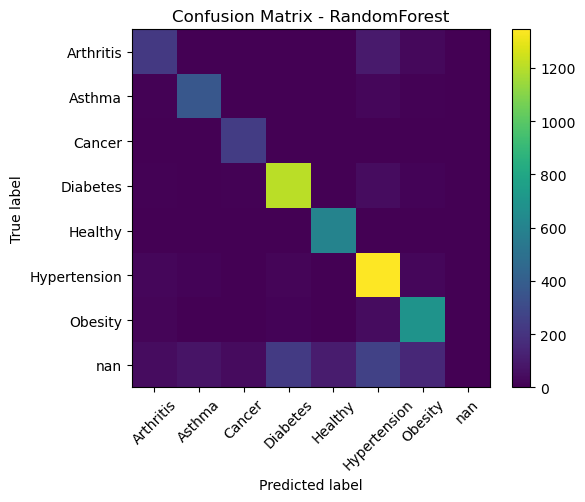

In [65]:
# Confusion matrix plot for best model
plt.figure(figsize=(6,5))
plt.imshow(best['confusion_matrix'], interpolation='nearest')
plt.title(f"Confusion Matrix - {best_name}")
plt.colorbar()
plt.xticks(range(len(label_enc.classes_)), label_enc.classes_, rotation=45)
plt.yticks(range(len(label_enc.classes_)), label_enc.classes_)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

In [69]:
# Feature importance for RandomForest (if available)
from IPython.display import display
if "RandomForest" in results:
    rf = results["RandomForest"]["model"]
    importances = rf.feature_importances_
    # Reduce feature names to match importances length (sometimes OneHot may change ordering)
    fn = feature_names
    fi_df = pd.DataFrame({"feature": fn, "importance": importances})
    fi_df = fi_df.sort_values(by='importance', ascending=False).head(30)
    print("Top Feature Importances (RandomForest):")
    display(fi_df)

Top Feature Importances (RandomForest):


,feature,importance
8,HbA1c,0.125332
1,Glucose,0.107877
5,LengthOfStay,0.107231
11,Physical Activity,0.083077
2,Blood Pressure,0.083012
0,Age,0.080805
3,BMI,0.072696
12,Diet Score,0.065091
4,Oxygen Saturation,0.053563
14,Stress Level,0.051254


In [71]:
# ROC AUC (multiclass) for best model using LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_test_b = lb.fit_transform(y_test)
best_proba = best['model'].predict_proba(X_test_p)
try:
    roc_auc = roc_auc_score(y_test_b, best_proba, average='macro', multi_class='ovr')
except Exception as e:
    roc_auc = None

print("ROC AUC (macro, multiclass) for best model:", roc_auc)

ROC AUC (macro, multiclass) for best model: 0.9189247420988391


In [ ]:
 Save artifacts
joblib.dump(preprocessor, "/mnt/data/preprocessor_final_v2.pkl")
joblib.dump(best['model'], "/mnt/data/best_model_final_v2.pkl")
joblib.dump(label_enc, "/mnt/data/label_encoder_final_v2.pkl")

